In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('../data/train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Удаляем лишние признаки
X = df.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis = 1)
y = df['Survived']

In [6]:
median = X['Age'].median()
X = X .fillna({'Age':median})

In [19]:
X = pd.get_dummies(X)

In [20]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
# Обучим наш случайный лес

In [22]:
clf_rf = RandomForestClassifier()

In [23]:
# Список параметров
params = {'n_estimators':range(10,51,10),'max_depth':range(1,11)}


In [24]:
# Создаем нашу решетку для поиска лучшего решения
grid_search = GridSearchCV(clf_rf,params,cv=5)

In [25]:
# Обучаем модель
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [26]:
grid_search.best_params_

{'max_depth': 9, 'n_estimators': 30}

### Задача
Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.

rf = RandomForestClassifier(n_estimators=15,max_depth=5)
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)

In [27]:
# Посмотрим на важность признаков 
best_clf = grid_search.best_estimator_

In [28]:
feature = best_clf.feature_importances_
feature

array([0.11544227, 0.18992113, 0.04688447, 0.04196978, 0.22193197,
       0.15614194, 0.17659945, 0.01922885, 0.00780812, 0.02407202])

In [29]:
feature_df = pd.DataFrame({'feature':list(X_train),'feature_importances':feature})

In [31]:
feature_df.sort_values('feature_importances',ascending=False)

,feature,feature_importances
4,Fare,0.221932
1,Age,0.189921
6,Sex_male,0.176599
5,Sex_female,0.156142
0,Pclass,0.115442
2,SibSp,0.046884
3,Parch,0.041970
9,Embarked_S,0.024072
7,Embarked_C,0.019229
8,Embarked_Q,0.007808


#### 3.2.13
Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте

np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)
imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [32]:
np.random.seed(0)

In [33]:
df = pd.read_csv('../data/heart.csv')

In [34]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
df.shape

(303, 14)

In [36]:
# Готовим данные
X = df.drop('target',axis=1)
y= df['target']

In [46]:
# Создаем классификатор
rf = RandomForestClassifier(10,max_depth=5)
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
X.plot()

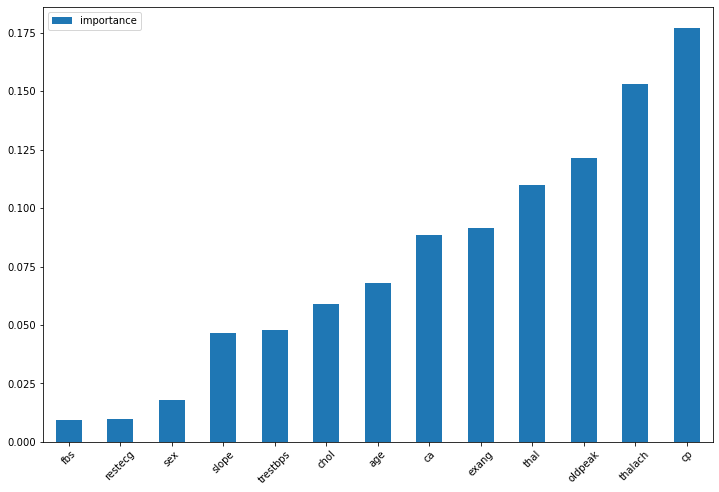

In [47]:
# Код для отрисовки графика важности признаков
imp = pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['importance'])
imp.sort_values('importance').plot(kind='bar',figsize=(12,8),rot = '45');
